# EDA (Exploratory Data Analysis) de The Movies Dataset

# IMPORTANDO LIBERIAS

In [1]:
# Importación de librerías
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast

In [ ]:
# Configuración de pandas
pd.set_option('display.max_columns', None)

: 

# CARGA DE DATOS

In [ ]:
# Lectura de los datos
df_credits = pd.read_csv('../data/credits.csv')
df_movies = pd.read_csv('../data/movies_metadata.csv')
df_keywords = pd.read_csv('../data/keywords.csv')
df_ratings = pd.read_csv('../data/ratings.csv')

: 

# ANÁLISIS EXPLORATORIO
- Revisión de la estructura de los datos (registros y tipos)
- Comprobación de datos nulos
- Comprobación de datos duplicados
- Realización de estadísticas descriptivas básicas

## credits.csv

In [ ]:
df_credits.head(5)

: 

In [ ]:
df_credits.info()

: 

In [ ]:
# Se puede visualizar que la columna cast es un string que contiene una lista de diccionarios
df_credits['cast'][0]

: 

In [ ]:
# Se puede visualizar que la columna crew es un string que contiene una lista de diccionarios
df_credits['crew'][0]

: 

In [ ]:
# Verificación de valores nulos
df_credits.isnull().sum()

: 

In [ ]:
# Verificación de valores duplicados
df_credits.duplicated().sum()

: 

## keywords.csv

In [ ]:
df_keywords.head(5)

: 

In [ ]:
df_keywords.info()

: 

In [ ]:
# Se puede visualizar que la columna keywords es un string que contiene una lista de diccionarios
df_keywords['keywords'][:5]

: 

In [ ]:
# Verificación de valores nulos
df_keywords.isnull().sum()

: 

In [ ]:
# Verificación de valores duplicados
df_keywords.duplicated().sum()

: 

## movies_metadata.csv

In [ ]:
df_movies.head(3)

: 

In [ ]:
# Se puede visualizar que la columna genres es un string que contiene una lista de diccionarios sobre los géneros de la película
df_movies["genres"][:5]

: 

In [ ]:
# Se puede visualizar que la columna production_companies es un string que contiene una lista de diccionarios
df_movies["spoken_languages"][:5]

: 

In [ ]:
df_movies.info()

: 

In [ ]:
#Verificar que datos de la columna 'id' no son numéricos
df_movies[pd.to_numeric(df_movies['id'], errors='coerce').isnull()]['id']

: 

In [ ]:
# Verificación de valores nulos
df_movies.isnull().sum()

: 

In [ ]:
# Verificación de valores duplicados
df_movies.duplicated().sum()

: 

In [ ]:
# Estadísticas descriptivas de las variables numéricas
df_movies.select_dtypes(include=[np.number]).describe()

: 

In [ ]:
# La mínima cantidad de votos de una pelicula para que esté en el Top 10% de las películas más votadas
df_movies["vote_count"].quantile(0.9)

: 

## ratings.csv

In [ ]:
df_ratings.head(5)

: 

In [ ]:
df_ratings.info()

: 

In [ ]:
df_ratings.isnull().sum()

: 

In [ ]:
df_ratings.duplicated().sum()

: 

In [ ]:
# Estadísticas descriptivas sobre las puntuaciones
df_ratings["rating"].describe()

: 

In [ ]:
# Número de películas únicas calificadas
len(df_ratings["movieId"].unique().tolist())

: 

# PRE-PROCESAMIENTO DE LOS DATOS
- Eliminación de variables
- Inclusión de nuevas variables
- Imputación o eliminación de datos nulos y duplicados
- Tratamiento de valores atípicos
- Codificación de variables categoricas

In [ ]:
# Función para extraer valores de las cadenas de las listas de diccionarios
def get_text(text, obj = 'name'):
    list_dict = ast.literal_eval(text)

    if len(list_dict) == 1:
        return list_dict[0][obj]

    s = []

    for i in list_dict:
        s.append(i[obj])
    return ', '.join(s)

: 

## credits.csv

In [ ]:
# Eliminación de valores duplicados
df_credits = df_credits.drop_duplicates()

: 

In [ ]:
# Creando nuevas columnas con los nombres de los actores y los personajes
df_credits['actor'] = df_credits['cast'].apply(get_text)
df_credits['characters'] = df_credits['cast'].apply(get_text, obj = 'character')

: 

In [ ]:
# Creando nuevas columnas con los nombres del equipo de producción
df_credits["crew"] = df_credits["crew"].apply(get_text)

: 

In [ ]:
df_credits = df_credits.drop(columns = ['cast'])

: 

## keywords.csv

In [ ]:
df_keywords = df_keywords.drop_duplicates()

: 

In [ ]:
# Reemplazando los valores de la columna keywords por los nombres de las palabras clave de la lista de diccionarios
df_keywords['keywords'] = df_keywords['keywords'].apply(get_text)

: 

## movies_metadata.csv

In [ ]:
# Eliminación de las filas que contienen fechas en la columna 'id'
date_rows = df_movies[df_movies['id'].str.match(r'^\d{4}-\d{2}-\d{2}$')]
df_movies = df_movies.drop(date_rows.index)

: 

In [ ]:
# Transformando el tipo de dato de la columna id a entero
df_movies["id"] = df_movies["id"].astype('int64')

: 

In [ ]:
# Eliminando columnas con más del 80% de valores nulos
df_movies = df_movies.drop(columns=["belongs_to_collection", "homepage"])

: 

In [ ]:
# Eliminando columnas que no se utilizarán
df_movies = df_movies.drop(columns=["imdb_id", "video", "status"])

: 

In [ ]:
# Eliminando registros con valores duplicados
df_movies = df_movies.drop_duplicates()

: 

In [ ]:
# Eliminando titulos duplicados
df_movies = df_movies[df_movies["original_title"].duplicated() == False]

: 

In [ ]:
# Eliminando titulos nulos
df_movies = df_movies.dropna(subset=["title"])

: 

In [ ]:
# Eliminando valores nulos de la columna overview
df_movies["overview"] = df_movies["overview"].fillna("")

: 

In [ ]:
# Eliminando valores nulos de la columna tagline
df_movies["tagline"] = df_movies["tagline"].fillna("")

: 

In [ ]:
# Reemplazando la duración de las películas (runtime) nulas por la media
df_movies["runtime"] = df_movies["runtime"].fillna(df_movies["runtime"].mean())

: 

In [ ]:
# Reemplazando los valores nulos de la columna 'release_date' por la fecha más común
df_movies["release_date"] = df_movies["release_date"].fillna(df_movies["release_date"].mode()[0])

: 

In [ ]:
# Reemplazando los valores nulos de la columna 'original_language' por el idioma más común
df_movies["original_language"] = df_movies["original_language"].fillna(df_movies["original_language"].mode()[0])

: 

In [ ]:
# Reemplazando los valores nulos de la columna "poster_path" por un string vacío
df_movies["poster_path"] = df_movies["poster_path"].fillna("")

: 

In [ ]:
# Reemplazando las listas de diccionarios de la columna genres por los nombres de los géneros
df_movies["genres"] = df_movies["genres"].apply(get_text)

: 

In [ ]:
# Reemplazando las listas de diccionarios de la columna production_companies por los nombres de las compañías de producción
df_movies["production_companies"] = df_movies["production_companies"].apply(get_text)

: 

In [ ]:
# Reemplazando las listas de diccionarios de la columna production_countries por los nombres de los países de producción
df_movies["production_countries"] = df_movies["production_countries"].apply(get_text)

: 

In [ ]:
# Reemplazando las listas de diccionarios de la columna spoken_languages por los nombres de los idiomas hablados
df_movies["spoken_languages"] = df_movies["spoken_languages"].apply(get_text)

: 

In [ ]:
m = df_movies['vote_count'].quantile(0.9)
C = df_movies['vote_average'].mean()

: 

In [ ]:
def weighted_rating(x, m = m, C = C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return ((v * R)/(v + m)) + ((m * C)/(v + m))

: 

In [ ]:
df_movies["score"] = df_movies.apply(weighted_rating, axis=1)

: 

In [ ]:
# Reemplazando las listas de diccionarios de la columna spoken_languages por los nombres de los idiomas hablados
df = df_movies.merge(df_credits, on = 'id').merge(df_keywords, on = 'id')

: 

In [ ]:
# Guardar el dataset limpio
df.to_csv("../data/dataset.csv", index=False)

: 

In [3]:
# Guardar el dataset limpio en formato JSON
df.to_json(orient = 'records', path_or_buf = '../data/dataset.json')

# VISUALIZACIÓN DE LOS DATOS

In [369]:
scores = df_movies.copy()

# Ordena las peliculas basado en el score calculado
scores = scores.sort_values('score', ascending=False)

scores = scores[['title', 'vote_count', 'vote_average', 'score']].head(10)

# Imprime las peliculas que pertenecen al Top 10
scores

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.447362
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.436887
834,The Godfather,6024.0,8.5,8.427482
12481,The Dark Knight,12269.0,8.3,8.266442
2843,Fight Club,9678.0,8.3,8.257600
292,Pulp Fiction,8670.0,8.3,8.252757
522,Schindler's List,4436.0,8.3,8.209198
23673,Whiplash,4376.0,8.3,8.207996
5481,Spirited Away,3968.0,8.3,8.198893
2211,Life Is Beautiful,3643.0,8.3,8.190244


In [370]:
palette = sns.color_palette("husl", len(scores))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28976\1596209010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='title', y='score', data=q_movies.head(50), palette=palette)


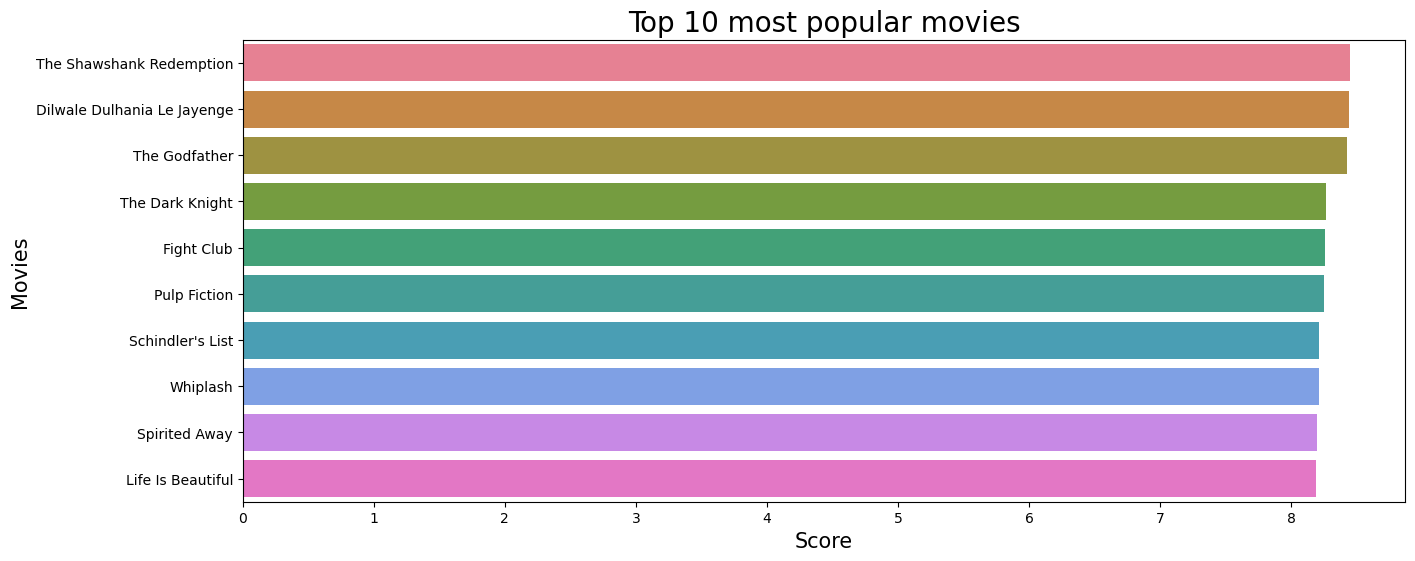

In [371]:
plt.figure(figsize=(15,6))
g = sns.barplot(x='score', y='title', data = scores, palette=palette)
g.set_title("Top 10 most popular movies", fontsize=20)
g.set_xlabel("Score", fontsize=15)
g.set_ylabel("Movies", fontsize=15)
plt.show()

c:\Users\HP\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


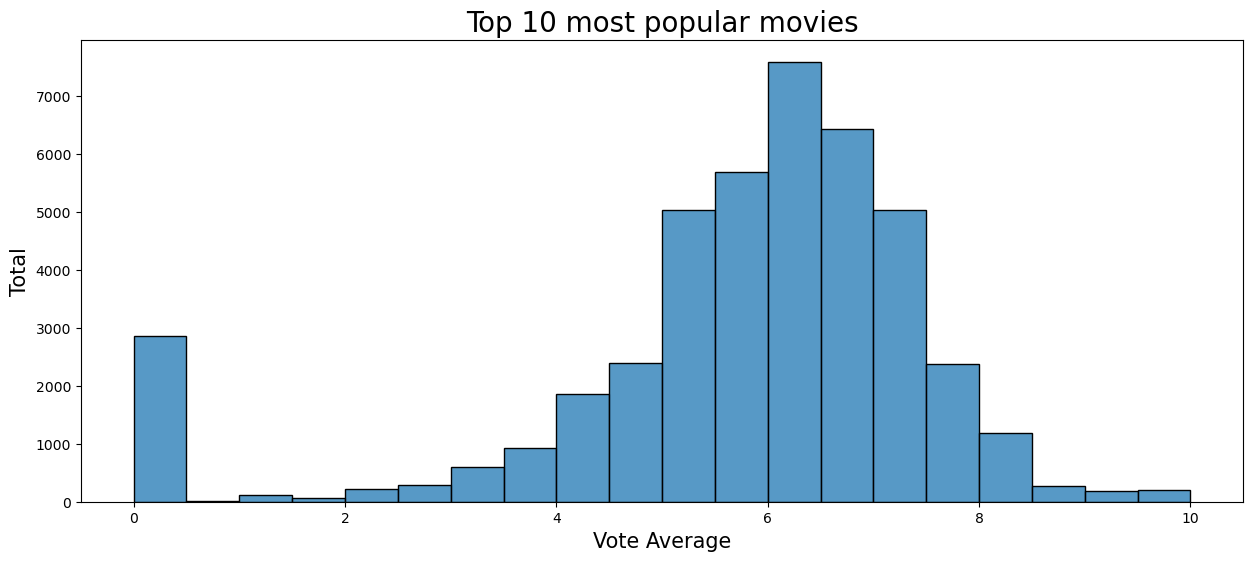

In [372]:
plt.figure(figsize=(15, 6))
g = sns.histplot(data = df, x='vote_average', binwidth = 0.5)
g.set_title("Top 10 most popular movies", fontsize=20)
g.set_xlabel("Vote Average", fontsize=15)
g.set_ylabel("Total", fontsize=15)
plt.show()

In [423]:
# Se crea una lista con los géneros de las películas
genres = []
for i in df['genres']:
    genres.extend(i.split(", "))

df_genres = pd.DataFrame(Counter(genres).most_common(), columns = ['genre', 'total'])
df_plot = pd.DataFrame(Counter(genres).most_common(10), columns = ['genre', 'total'])
df_plot.loc[len(df_plot)] = {'genre' : 'Other', 'total': df_genres['total'][10:].sum()}

In [403]:
palette = sns.color_palette("pastel6")

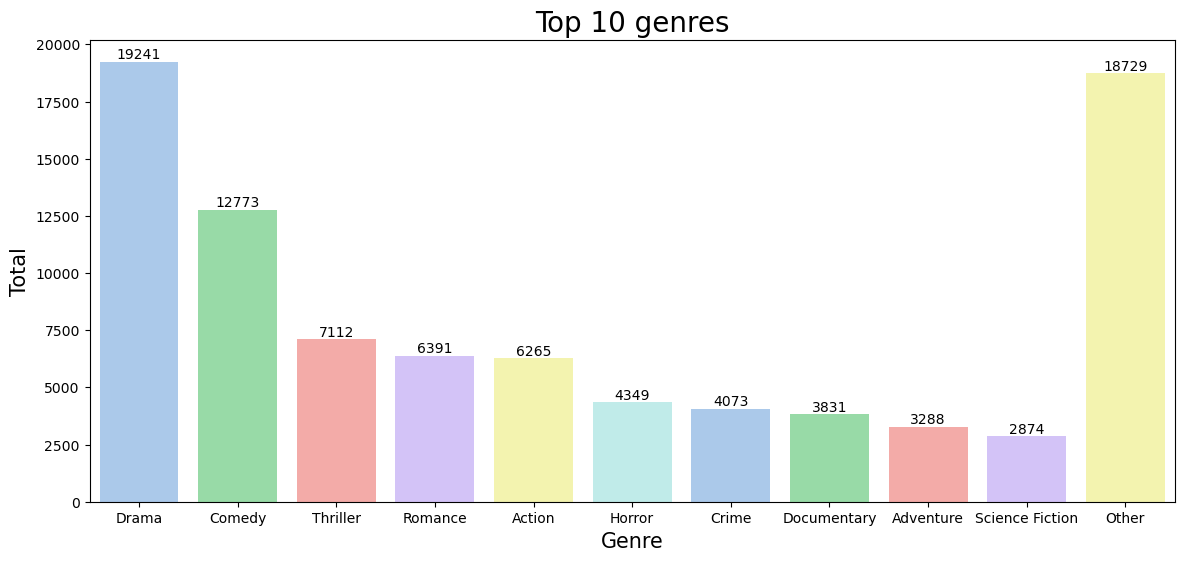

In [429]:
plt.figure(figsize=(14, 6))
g = sns.barplot(data = df_plot, x = "genre", y = "total", palette= palette)
g.bar_label(g.containers[0], fontsize = 10)
g.set_title("Top 10 genres", fontsize=20)
g.set_xlabel("Genre", fontsize=15)
g.set_ylabel("Total", fontsize=15)
plt.show()

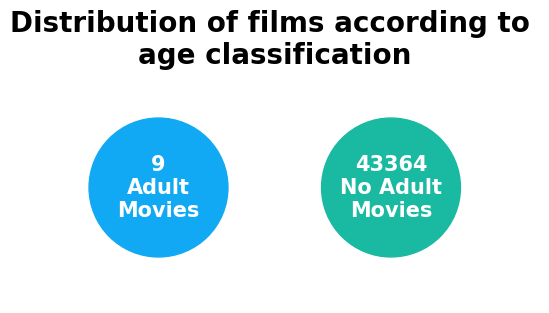

In [494]:
plt.figure(figsize=(6, 3))
plt.xlim(0.5, 2.5)
plt.ylim(0.5, 1.5)

plt.title("Distribution of films according to \nage classification", fontsize = 20, weight = 800, color = 'black')
plt.scatter(x = [1.0, 2.0], y = [1.0, 1.0], s = 10000, color = ["#11A9f4", "#1AB9A1"])
plt.text(1.0, 1.0, '{}\nAdult\nMovies'.format(str(len(df[df["adult"] == 'True']))), fontsize = 15, weight = 800, va = 'center', ha = 'center', color = 'white')
plt.text(2.0, 1.0, '{}\nNo Adult\nMovies'.format(str(len(df[df["adult"] == 'False']))), fontsize = 15, weight = 800, va = 'center', ha = 'center', color = 'white')
plt.axis('off')
plt.show()

## NUBES DE PALABRAS

### En base a la descripción de cada película

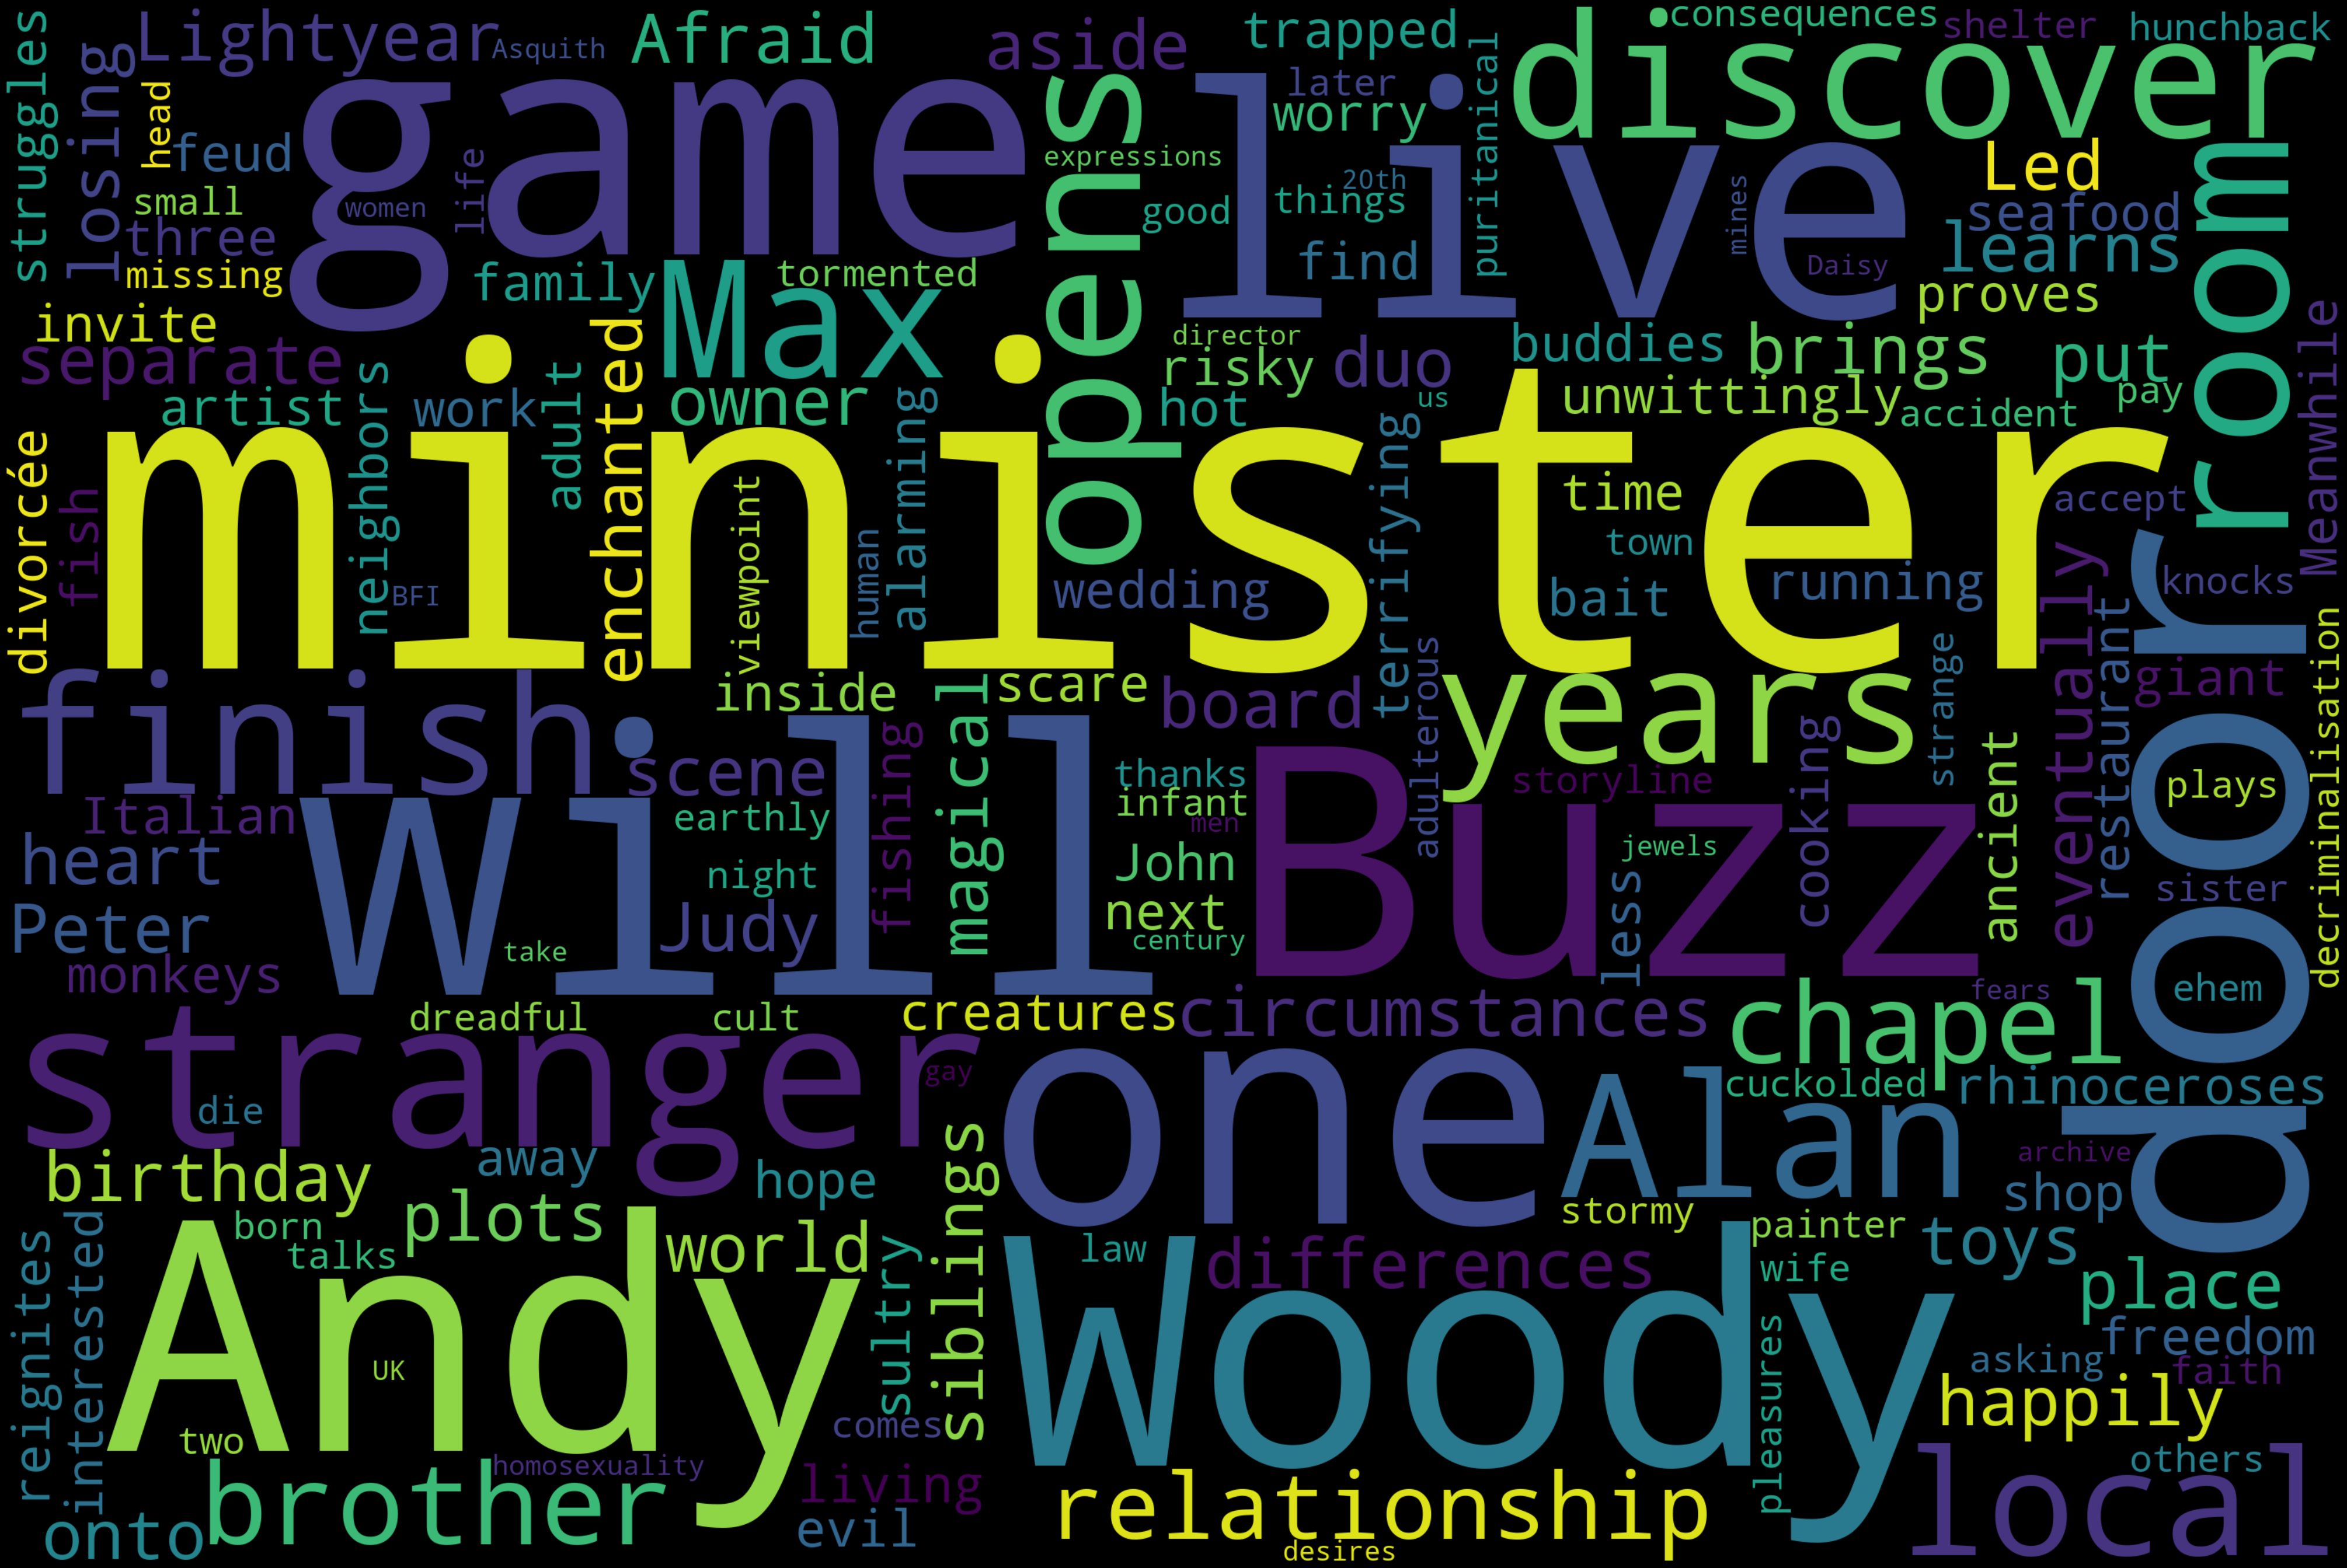

In [446]:
text = df_limpio.overview.values
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()